# Exploratory Analysis

The analysis is based on maps and graphs that derived from health insurance coverage data from ACS from 2012 to 2016. We expect to find the trend of change in health insurance coverage, and look for features and characteriscs of health insurance data.

The analysis includes four parts. 

In the first part, we create choropleth maps on precent of health insurance coverage in state level from 2012 to 2016.

In the second part, we create graph to show the percent of change in private health insurance coverage in state level from 2012 to 2016.

In the third part, we create graph to show the percent of change in public health insurance coverage in state level from 2012 to 2016.

In the final part, we create choropleth maps of the percent of no health insurance coverage based on different age group and employment status in 2016.

# PART 1: Health Insurance Coverage from 2012 to 2016

In [12]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import numpy as np
import requests, json
import seaborn as sns
sns.set_style("whitegrid", rc={'axes.linewidth': 2.5})
sns.set_context('notebook', font_scale=1.45, rc={"lines.linewidth": 3, "figure.figsize" : (7, 3)})

import plotly   
import plotly.plotly as py
plotly.tools.set_credentials_file(username='wusiyu94', api_key='o7kCXdZqRM9A3JTHRIxi')
import time
from plotly.grid_objs import Grid, Column

#from urllib.parse import quote
import json
from branca.colormap import linear
import folium
import os

In [2]:
geo_df = gpd.read_file("data/cb_2016_us_state_20m/cb_2016_us_state_20m.shp")
#geo_df.set_index(geo_df["STATEFP"].astype(int), inplace = True)
geo_df["STATEFP"] = geo_df["STATEFP"].astype(int)

In [3]:
def get_map_data(year):
    filename = "data/acs_{}_state.csv".format(year)
    insurance_df = pd.read_csv(filename)
    insurance_df.rename(columns = {"NAME" : "State","state":"STATEFP"}, inplace = True)
    insurance_df["STATEFP"] = insurance_df["STATEFP"].astype(int)
    insurance_df.drop(insurance_df.columns[[0]], axis=1, inplace=True)
    return insurance_df   

In [4]:
insurance_df_2016 = get_map_data(2016)
insurance_df_2015 = get_map_data(2015)
insurance_df_2014 = get_map_data(2014)
insurance_df_2013 = get_map_data(2013)
insurance_df_2012 = get_map_data(2012)

In [5]:
geo_merge_2016 = geo_df.merge(insurance_df_2016, how='inner', on = "STATEFP")
geo_merge_2016.rename(columns = {"NAME" : "STATE"}, inplace = True)
geo_merge_2015 = geo_df.merge(insurance_df_2015, how='inner', on = "STATEFP")
geo_merge_2015.rename(columns = {"NAME" : "STATE"}, inplace = True)
geo_merge_2014 = geo_df.merge(insurance_df_2014, how='inner', on = "STATEFP")
geo_merge_2014.rename(columns = {"NAME" : "STATE"}, inplace = True)
geo_merge_2013 = geo_df.merge(insurance_df_2013, how='inner', on = "STATEFP")
geo_merge_2013.rename(columns = {"NAME" : "STATE"}, inplace = True)
geo_merge_2012 = geo_df.merge(insurance_df_2012, how='inner', on = "STATEFP")
geo_merge_2012.rename(columns = {"NAME" : "STATE"}, inplace = True)

In [6]:
us_states = os.path.join('data', 'us-states.json')

geo_json_data = json.load(open(us_states))

m = folium.Map([43, -100], zoom_start=4)

folium.GeoJson(
    geo_json_data,
    name = 'basemap',
    style_function=lambda feature: {
        'fillColor': '#fcfcfc',
        'color': 'black',
        'weight': 2,
        'dashArray': '5, 5'
    }
).add_to(m)

In [7]:
colormap = linear.YlGn.scale(60,100)
print(colormap(5.0))

#ffffcc


In [8]:
geo_merge_dict_2016 = geo_merge_2016.set_index('STUSPS')['DP03_0096PE']   
geo_merge_dict_2015 = geo_merge_2015.set_index('STUSPS')['DP03_0096PE']   
geo_merge_dict_2014 = geo_merge_2014.set_index('STUSPS')['DP03_0096PE']   
geo_merge_dict_2013 = geo_merge_2013.set_index('STUSPS')['DP03_0096PE']   
geo_merge_dict_2012 = geo_merge_2012.set_index('STUSPS')['DP03_0096PE']   

In [9]:
folium.GeoJson(
    geo_json_data,
    name='2016',
    style_function=lambda feature: {
        'fillColor': colormap(geo_merge_dict_2016[feature['id']]),
        'color': 'black',
        'weight': 1,
        'dashArray': '5, 5',
        'fillOpacity': 0.9,
    }
).add_to(m)

folium.GeoJson(
    geo_json_data,
    name='2015',
    style_function=lambda feature: {
        'fillColor': colormap(geo_merge_dict_2015[feature['id']]),
        'color': 'black',
        'weight': 1,
        'dashArray': '5, 5',
        'fillOpacity': 0.9,
    }
).add_to(m)

folium.GeoJson(
    geo_json_data,
    name='2014',
    style_function=lambda feature: {
        'fillColor': colormap(geo_merge_dict_2014[feature['id']]),
        'color': 'black',
        'weight': 1,
        'dashArray': '5, 5',
        'fillOpacity': 0.9,
    }
).add_to(m)

folium.GeoJson(
    geo_json_data,
    name='2013',
    style_function=lambda feature: {
        'fillColor': colormap(geo_merge_dict_2013[feature['id']]),
        'color': 'black',
        'weight': 1,
        'dashArray': '5, 5',
        'fillOpacity': 0.9,
    }
).add_to(m)

folium.GeoJson(
    geo_json_data,
    name='2012',
    style_function=lambda feature: {
        'fillColor': colormap(geo_merge_dict_2012[feature['id']]),
        'color': 'black',
        'weight': 1,
        'dashArray': '5, 5',
        'fillOpacity': 0.9,
    }
).add_to(m)

In [10]:
colormap.caption = 'Percent with Health Insurance Coverage'
colormap.add_to(m)
folium.LayerControl().add_to(m)

m

In [11]:
m.save(os.path.join('percent_insurance_2012_2016.html'))

As shown in the map, the health insurance coverage increases significantly from 2012 to 2016. 

In 2012, the average level of health insurance coverage is 86%, and it is 92% in 2016. 

States in the Northeastern United States always perform better than other regions, although the gap between them become smaller in 2016. 

The increase rate in north, east, west and middle of US is higher than in the south.

In 2016, the top 5 states with the highest health insurance coverage are: Massachusetts (97.5%), Hawaii (96.5%), Vermont (96.3%), District of Columbia (96.1%), and Minnesota (95.9%).

# PART 2: Percent of Private Health Insurance Coverage: 2012-2016

In [77]:
insurance_allyear = pd.DataFrame()

for year in range(2012,2017):
    filename = "data/acs_{}_state.csv".format(year)
    insurance_single = pd.read_csv(filename)
    insurance_single['year'] = year
    insurance_single['DP03_0097PE'] = insurance_single['DP03_0097PE']* insurance_single['DP03_0096PE']/100 
    insurance_single['DP03_0098PE'] = insurance_single['DP03_0098PE']* insurance_single['DP03_0096PE']/100  
    insurance_allyear = insurance_allyear.append(insurance_single)

insurance_allyear.drop(insurance_allyear.columns[[0,1,3,4,6,7,8,9,10,11,12,13,14,15,16]], axis=1, inplace=True)
insurance_allyear.head()

,DP03_0097PE,NAME,year
0,56.4417,Alabama,2012
1,50.0055,Alaska,2012
2,48.8632,Arizona,2012
3,49.0732,Arkansas,2012
4,49.2600,California,2012


In [15]:
years_from_col = set(insurance_allyear['year'])
years_ints = sorted(list(years_from_col))
years = [str(year) for year in years_ints]

In [16]:
# make list of continents
states = []
for state in insurance_allyear['NAME']:
    if state not in states: 
        states.append(state)

In [17]:
columns = []
# make grid
for year in years:
    for state in states:
        insurance_allyear_by_year = insurance_allyear[insurance_allyear['year'] == int(year)]
        insurance_allyear_by_year_and_state = insurance_allyear_by_year[insurance_allyear_by_year['NAME'] == state]
        for col_name in insurance_allyear_by_year_and_state:
            # each column name is unique
            column_name = '{year}_{state}_{header}_gapminder_grid'.format(
                year=year, state=state, header=col_name
            )
            a_column = Column(list(insurance_allyear_by_year_and_state[col_name]), column_name)
            columns.append(a_column)

# upload grid
grid = Grid(columns)
url = py.grid_ops.upload(grid, 'gapminder_grid'+str(time.time()), auto_open=False)
url

'https://plot.ly/~wusiyu94/21/'

In [18]:
figure = {
    'data': [],
    'layout': {},
    'frames': [],
    'config': {'scrollzoom': True}
}

# fill in most of layout
figure['layout']['xaxis'] = {'title': 'State', 'gridcolor': '#FFFFFF'}
figure['layout']['yaxis'] = {'gridcolor': '#FFFFFF'}
figure['layout']['hovermode'] = 'closest'
figure['layout']['plot_bgcolor'] = 'rgb(223, 232, 243)'
figure['layout']['title'] = 'Percent of Private Health Insurance Coverage: 2012-2016'

In [19]:
figure['layout']['sliders']={
    'active':0,
    'yanchor':'top',
    'xanchor':'left',
    'currentvalue':{
        'font':{'size':20},
        'prefix':'text-before-value-on-display',
        'visible':True,
        'xanchor':'right'
    },
    'transition': {'duration': 300, 'easing': 'cubic-in-out'},
    'pad': {'b': 10, 't': 50},
    'len': 0.9,
    'x': 0.1,
    'y': 0,
    'steps': [...]
}

In [20]:
{
    'method': 'animate',
    'label': 'label-for-frame',
    'value': 'value-for-frame(defaults to label)',
    'args': [{'frame': {'duration': 300, 'redraw': False},
         'mode': 'immediate'}
    ],
}

{'args': [{'frame': {'duration': 300, 'redraw': False}, 'mode': 'immediate'}],
 'label': 'label-for-frame',
 'method': 'animate',
 'value': 'value-for-frame(defaults to label)'}

In [21]:
sliders_dict = {
    'active': 0,
    'yanchor': 'top',
    'xanchor': 'left',
    'currentvalue': {
        'font': {'size': 10},
        'prefix': 'Year:',
        'visible': True,
        'xanchor': 'right'
    },
    'transition': {'duration': 300, 'easing': 'cubic-in-out'},
    'pad': {'b': 10, 't': 50},
    'len': 0.9,
    'x': 0.1,
    'y': 0,
    'steps': []
}

In [22]:
figure['layout']['updatemenus'] = [
    {
        'buttons': [
            {
                'args': [None, {'frame': {'duration': 500, 'redraw': False},
                         'fromcurrent': True, 'transition': {'duration': 300, 'easing': 'quadratic-in-out'}}],
                'label': 'Play',
                'method': 'animate'
            },
            {
                'args': [[None], {'frame': {'duration': 0, 'redraw': False}, 'mode': 'immediate',
                'transition': {'duration': 0}}],
                'label': 'Pause',
                'method': 'animate'
            }
        ],
        'direction': 'left',
        'pad': {'r': 10, 't': 87},
        'showactive': False,
        'type': 'buttons',
        'x': 0.1,
        'xanchor': 'right',
        'y': 0,
        'yanchor': 'top'
    }
]


In [23]:
col_name_template = '{year}_{state}_{header}_gapminder_grid'
year = 2012
for state in states:
    data_dict = {
        'xsrc': grid.get_column_reference(col_name_template.format(
            year=year, state=state, header='NAME'
        )),
        'ysrc': grid.get_column_reference(col_name_template.format(
            year=year, state=state, header='DP03_0097PE'
        )),
        'name': state
    }
    figure['data'].append(data_dict)

In [24]:
frame = {'data': []}
figure['layout']['sliders'] = [sliders_dict]

In [25]:
for year in years:
    frame = {'data': [], 'name': str(year)}
    for state in states:
        data_dict = {
            'xsrc': grid.get_column_reference(col_name_template.format(
                year=year, state=state, header='NAME'
            )),
            'ysrc': grid.get_column_reference(col_name_template.format(
                year=year, state=state, header='DP03_0097PE'
            )),
            'name': state
        }
        frame['data'].append(data_dict)

    figure['frames'].append(frame)
    slider_step = {'args': [
        [year],
        {'frame': {'duration': 300, 'redraw': False},
         'mode': 'immediate',
       'transition': {'duration': 300}}
    ],
    'label': year,
    'method': 'animate'}
    sliders_dict['steps'].append(slider_step)

figure['layout']['sliders'] = [sliders_dict]

In [26]:
py.icreate_animations(figure, 'gapminder_example'+str(time.time()))

Most of people who are insured use private insurance. The share of private insurance is higher than 50% in most of states. There are 11 states whoes private insurance share is less than 50%, while this number in 2016 is only one (Puerto Rico, 36.9%).

The private insurance share is 60.6% at average level in 2012, whhile the share is 69.0% in 2016. 

There is a relatively large increase from 2013 to 2014 comparing with other periods.

Most of the states experienced a increase in private health insurance coverage, and only 7 states experienced a dicrease. Texas increased by 5.5% from 2012 to 2016, which is the highest among the states; while Puerto Rico experienced a 1.3% decrease.

# PART 3: Percent of Public Health Insurance Coverage: 2012-2016

In [39]:
insurance_allyear = pd.DataFrame()

for year in range(2012,2017):
    filename = "data/acs_{}_state.csv".format(year)
    insurance_single = pd.read_csv(filename)
    insurance_single['year'] = year
    insurance_single['DP03_0097PE'] = insurance_single['DP03_0097PE']* insurance_single['DP03_0096PE']/100 
    insurance_single['DP03_0098PE'] = insurance_single['DP03_0098PE']* insurance_single['DP03_0096PE']/100  
    insurance_allyear = insurance_allyear.append(insurance_single)

insurance_allyear.drop(insurance_allyear.columns[[0,1,2,4,6,7,8,9,10,11,12,13,14,15,16]], axis=1, inplace=True)
insurance_allyear.head()

,DP03_0098PE,NAME,year
0,29.9982,Alabama,2012
1,20.3520,Alaska,2012
2,28.0984,Arizona,2012
3,30.4304,Arkansas,2012
4,25.0405,California,2012


In [40]:
years_from_col = set(insurance_allyear['year'])
years_ints = sorted(list(years_from_col))
years = [str(year) for year in years_ints]

In [41]:
# make list of continents
states = []
for state in insurance_allyear['NAME']:
    if state not in states: 
        states.append(state)

In [42]:
columns = []
# make grid
for year in years:
    for state in states:
        insurance_allyear_by_year = insurance_allyear[insurance_allyear['year'] == int(year)]
        insurance_allyear_by_year_and_state = insurance_allyear_by_year[insurance_allyear_by_year['NAME'] == state]
        for col_name in insurance_allyear_by_year_and_state:
            # each column name is unique
            column_name = '{year}_{state}_{header}_gapminder_grid'.format(
                year=year, state=state, header=col_name
            )
            a_column = Column(list(insurance_allyear_by_year_and_state[col_name]), column_name)
            columns.append(a_column)

# upload grid
grid = Grid(columns)
url = py.grid_ops.upload(grid, 'gapminder_grid'+str(time.time()), auto_open=False)
url

'https://plot.ly/~wusiyu94/25/'

In [43]:
figure = {
    'data': [],
    'layout': {},
    'frames': [],
    'config': {'scrollzoom': True}
}

# fill in most of layout
figure['layout']['xaxis'] = {'title': 'State', 'gridcolor': '#FFFFFF'}
figure['layout']['yaxis'] = {'gridcolor': '#FFFFFF'}
figure['layout']['hovermode'] = 'closest'
figure['layout']['plot_bgcolor'] = 'rgb(223, 232, 243)'
figure['layout']['title'] = 'Percent of Public Health Insurance Coverage: 2012-2016'

figure['layout']['sliders']={
    'active':0,
    'yanchor':'top',
    'xanchor':'left',
    'currentvalue':{
        'font':{'size':20},
        'prefix':'text-before-value-on-display',
        'visible':True,
        'xanchor':'right'
    },
    'transition': {'duration': 300, 'easing': 'cubic-in-out'},
    'pad': {'b': 10, 't': 50},
    'len': 0.9,
    'x': 0.1,
    'y': 0,
    'steps': [...]
}

In [44]:
{
    'method': 'animate',
    'label': 'label-for-frame',
    'value': 'value-for-frame(defaults to label)',
    'args': [{'frame': {'duration': 300, 'redraw': False},
         'mode': 'immediate'}
    ],
}

{'args': [{'frame': {'duration': 300, 'redraw': False}, 'mode': 'immediate'}],
 'label': 'label-for-frame',
 'method': 'animate',
 'value': 'value-for-frame(defaults to label)'}

In [45]:
sliders_dict = {
    'active': 0,
    'yanchor': 'top',
    'xanchor': 'left',
    'currentvalue': {
        'font': {'size': 10},
        'prefix': 'Year:',
        'visible': True,
        'xanchor': 'right'
    },
    'transition': {'duration': 300, 'easing': 'cubic-in-out'},
    'pad': {'b': 10, 't': 50},
    'len': 0.9,
    'x': 0.1,
    'y': 0,
    'steps': []
}

In [46]:
figure['layout']['updatemenus'] = [
    {
        'buttons': [
            {
                'args': [None, {'frame': {'duration': 500, 'redraw': False},
                         'fromcurrent': True, 'transition': {'duration': 300, 'easing': 'quadratic-in-out'}}],
                'label': 'Play',
                'method': 'animate'
            },
            {
                'args': [[None], {'frame': {'duration': 0, 'redraw': False}, 'mode': 'immediate',
                'transition': {'duration': 0}}],
                'label': 'Pause',
                'method': 'animate'
            }
        ],
        'direction': 'left',
        'pad': {'r': 10, 't': 87},
        'showactive': False,
        'type': 'buttons',
        'x': 0.1,
        'xanchor': 'right',
        'y': 0,
        'yanchor': 'top'
    }
]


In [47]:
col_name_template = '{year}_{state}_{header}_gapminder_grid'
year = 2012
for state in states:
    data_dict = {
        'xsrc': grid.get_column_reference(col_name_template.format(
            year=year, state=state, header='NAME'
        )),
        'ysrc': grid.get_column_reference(col_name_template.format(
            year=year, state=state, header='DP03_0098PE'
        )),
        'name': state
    }
    figure['data'].append(data_dict)

In [48]:
frame = {'data': []}
figure['layout']['sliders'] = [sliders_dict]

In [49]:
for year in years:
    frame = {'data': [], 'name': str(year)}
    for state in states:
        data_dict = {
            'xsrc': grid.get_column_reference(col_name_template.format(
                year=year, state=state, header='NAME'
            )),
            'ysrc': grid.get_column_reference(col_name_template.format(
                year=year, state=state, header='DP03_0098PE'
            )),
            'name': state
        }
        frame['data'].append(data_dict)

    figure['frames'].append(frame)
    slider_step = {'args': [
        [year],
        {'frame': {'duration': 300, 'redraw': False},
         'mode': 'immediate',
       'transition': {'duration': 300}}
    ],
    'label': year,
    'method': 'animate'}
    sliders_dict['steps'].append(slider_step)

figure['layout']['sliders'] = [sliders_dict]

In [50]:
py.icreate_animations(figure, 'gapminder_example'+str(time.time()))

The share of public insurance is 31.5% on avaerage in 2012, while the share is 35.6% on avaerage in 2016.

Among all the states, Puerto Rico is an outlier since the share of public health insurance is much higher than the private.

Most of states experienced a increase in public health insurance coverage from 2012 to 2016, expect for two states (Maine decreased by 2.8% and Wyoming decreased by 0.2%). There are two states that experienced a increase more than 10% (West Virginia increased by 11.5% and New Mexico increased by 10.3%).

As for the trend, the difference between states become larger from 2012 to 2016.

Comparing with the private health insurance coverage data as shown before, the increase in public health insurnace coverage is higher than it is in private health insurance coverage.

Therefore, we are interested in whether ACA has impact on those kind of differences and changes. 

In [86]:
insurance_allyear = pd.DataFrame()

for year in range(2012,2017):
    filename = "data/acs_{}_state.csv".format(year)
    insurance_single = pd.read_csv(filename)
    insurance_single['year'] = year
    #insurance_single['DP03_0097PE'] = insurance_single['DP03_0097PE']* insurance_single['DP03_0096PE']/100 
    #insurance_single['DP03_0098PE'] = insurance_single['DP03_0098PE']* insurance_single['DP03_0096PE']/100  
    insurance_allyear = insurance_allyear.append(insurance_single)

insurance_allyear.drop(insurance_allyear.columns[[0,4,7,8,9,10,11,12,13,14,15,16]], axis=1, inplace=True)

In [87]:
expansion_list = [4,5,6,8,9,10,11,15,17,19,21,24,25,26,27,32,33,34,35,36,38,39,41,44,50,53,54]
b_list = []
a_list = insurance_allyear['state'].values.tolist()
for i in a_list :
    if i in expansion_list : b_list.append(1)
    else: b_list.append(0)
insurance_allyear['ACA_expand'] = b_list

In [88]:
insurance_mean = insurance_allyear.groupby(['year','ACA_expand'],as_index = False).mean()
insurance_mean_ACA = insurance_mean[insurance_mean['ACA_expand']==1]
insurance_mean_noACA = insurance_mean[insurance_mean['ACA_expand']==0]
insurance_mean_ACA.rename(columns={'DP03_0096PE':'ACA expand health insurance',
                                   'DP03_0097PE':'ACA expand private health insurance',
                                   'DP03_0098PE':'ACA expand public health insurance',},inplace = True)

insurance_mean_noACA.rename(columns={'DP03_0096PE':'No ACA expand health insurance',
                                   'DP03_0097PE':'No ACA expand private health insurance',
                                   'DP03_0098PE':'No ACA expand public health insurance',},inplace = True)

/Users/siyu/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:2746: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [89]:
insurance_mean_merge = insurance_mean_ACA.merge(insurance_mean_noACA, how='inner', on = "year")
insurance_mean_merge.set_index(insurance_mean_merge['year'], inplace=True)
insurance_mean_merge.drop(insurance_mean_merge.columns[[0,1,5,6,10]], axis=1, inplace=True)
insurance_mean_merge

,ACA expand health insurance,ACA expand private health insurance,ACA expand public health insurance,No ACA expand health insurance,No ACA expand private health insurance,No ACA expand public health insurance
year,,,,,,
2012,88.033333,68.444444,31.570370,85.180,64.808,31.744
2013,88.100000,68.037037,32.140741,85.584,65.072,32.072
2014,91.181481,68.785185,34.703704,87.492,66.424,32.636
2015,93.203704,69.537037,36.244444,89.320,67.836,33.404
2016,93.948148,69.659259,37.088889,90.172,68.208,34.144


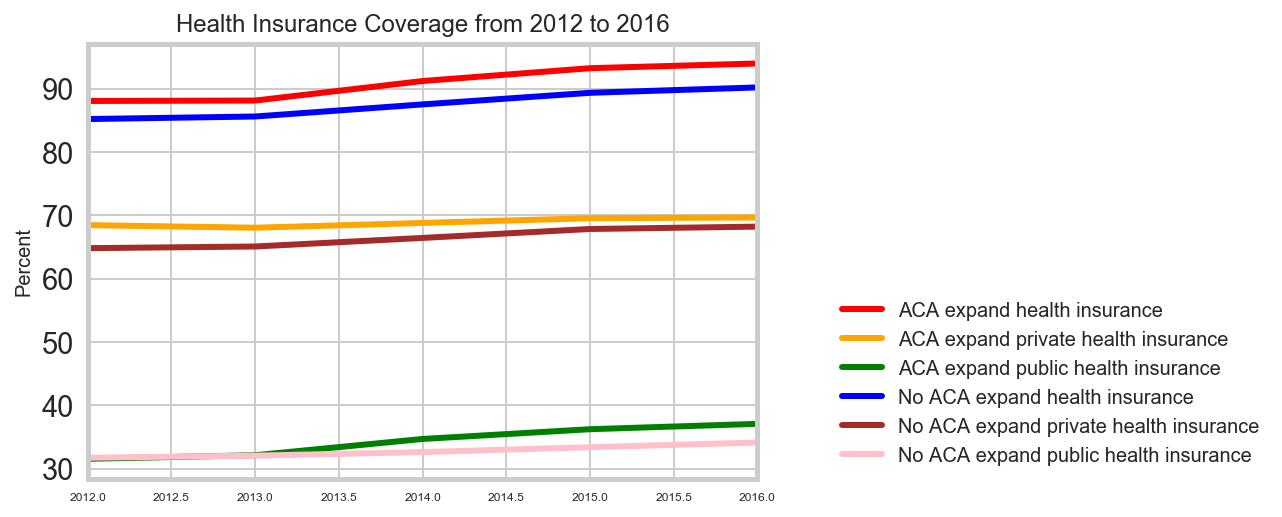

In [94]:
ax = insurance_mean_merge["ACA expand health insurance"].plot(color = "red")
insurance_mean_merge["ACA expand private health insurance"].plot(color = "orange", ax = ax)
insurance_mean_merge["ACA expand public health insurance"].plot(color = "green", ax = ax)
insurance_mean_merge["No ACA expand health insurance"].plot(color = "blue", ax = ax)
insurance_mean_merge["No ACA expand private health insurance"].plot(color = "brown", ax = ax)
insurance_mean_merge["No ACA expand public health insurance"].plot(color = "pink", ax = ax)

ax.legend(labels = ["ACA expand health insurance", "ACA expand private health insurance","ACA expand public health insurance",
                    "No ACA expand health insurance","No ACA expand private health insurance","No ACA expand public health insurance"],fontsize=10)
ax.set_ylabel("Percent",fontsize=10)
ax.set_xlabel("")
ax.set_title("Health Insurance Coverage from 2012 to 2016",fontsize=12)
ax.get_legend().set_bbox_to_anchor((1.1, 0.45))
plt.rc('xtick', labelsize=8) 


plt.show()

ax.figure.savefig("aca_effect.jpg")

The figure shows that there is difference bewteen ACA expansion states and No ACA expansion states. Therefore, ACA might have impact on those kind of differences and changes we stated above.

# PART 4: No Health Insurance Coverage in 4 different categories in 2016
(1)population less than 18 years;

(2)population in 18-64 years, in labor force and employed;

(3)population in 18-64 years, in labor force and unemployed;

(4)population in 18-64 years, not in labor force

In [51]:
insurance_df = pd.read_csv("data/acs_2016_state.csv")
insurance_df.rename(columns = {"NAME" : "State","state":"STATEFP"}, inplace = True)
insurance_df["STATEFP"] = insurance_df["STATEFP"].astype(int)
insurance_df.drop(insurance_df.columns[[0]], axis=1, inplace=True)
insurance_df.head()

,DP03_0096PE,DP03_0097PE,DP03_0098PE,DP03_0099PE,State,STATEFP,DP03_0101PE,DP03_0106PE,DP03_0107PE,DP03_0108PE,DP03_0111PE,DP03_0112PE,DP03_0113PE,DP03_0116PE,DP03_0117PE,DP03_0118PE
0,90.9,67.9,36.9,9.1,Alabama,1,2.4,85.0,6.5,11.4,44.1,24.6,35.4,53.3,41.7,16.2
1,86.0,67.3,29.4,14.0,Alaska,2,10.0,78.5,11.1,15.2,44.5,29.2,31.1,50.6,32.2,22.8
2,90.0,62.2,39.7,10.0,Arizona,4,7.3,76.0,13.9,12.8,35.0,45.1,22.9,47.5,43.3,14.7
3,92.1,62.0,43.2,7.9,Arkansas,5,3.6,79.7,12.7,10.8,37.1,38.6,28.4,46.3,51.6,11.3
4,92.7,63.0,38.9,7.3,California,6,2.9,76.7,16.2,9.5,40.3,44.7,17.8,50.0,44.1,11.1


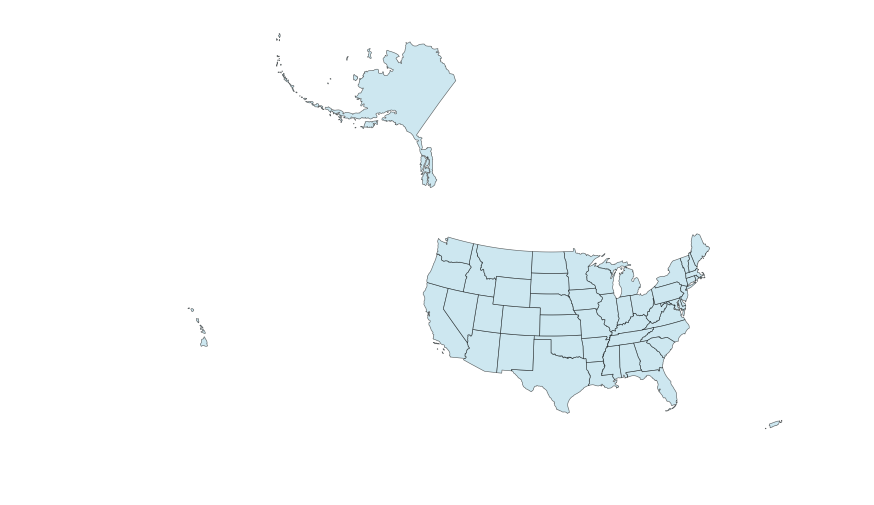

In [52]:
geo_df = gpd.read_file("data/cb_2016_us_state_20m/cb_2016_us_state_20m.shp")
#geo_df.set_index(geo_df["STATEFP"].astype(int), inplace = True)
geo_df["STATEFP"] = geo_df["STATEFP"].astype(int)
geo_df.to_crs(epsg = 2163).plot(facecolor = "lightblue", alpha = 0.6, edgecolor = "black").set_axis_off()

In [53]:
geo_merge = geo_df.merge(insurance_df, how='inner', on = "STATEFP")
geo_merge.rename(columns = {"NAME" : "STATE"}, inplace = True)
geo_merge.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,STATE,LSAD,ALAND,AWATER,geometry,...,DP03_0101PE,DP03_0106PE,DP03_0107PE,DP03_0108PE,DP03_0111PE,DP03_0112PE,DP03_0113PE,DP03_0116PE,DP03_0117PE,DP03_0118PE
0,23,01779787,0400000US23,23,ME,Maine,00,79885221885,11748755195,"(POLYGON ((-68.92401 43.885407, -68.8747839999...",...,4.6,82.9,8.7,10.8,40.8,25.8,35.8,47.9,49.8,10.7
1,15,01779782,0400000US15,15,HI,Hawaii,00,16634100855,11777698394,"(POLYGON ((-156.049651 19.780452, -156.006267 ...",...,2.2,89.3,10.3,3.7,47.9,36.9,17.9,60.0,40.2,7.2
2,4,01779777,0400000US04,04,AZ,Arizona,00,294198560125,1027346486,"POLYGON ((-114.799683 32.593621, -114.809393 3...",...,7.3,76.0,13.9,12.8,35.0,45.1,22.9,47.5,43.3,14.7
3,5,00068085,0400000US05,05,AR,Arkansas,00,134771517596,2960191698,"POLYGON ((-94.617919 36.499414, -94.3612029999...",...,3.6,79.7,12.7,10.8,37.1,38.6,28.4,46.3,51.6,11.3
4,10,01779781,0400000US10,10,DE,Delaware,00,5047194742,1398720828,"POLYGON ((-75.773786 39.7222, -75.753227999999...",...,3.1,83.0,11.3,7.6,40.0,48.8,14.0,58.4,40.6,7.7


In [54]:
us_states = os.path.join('data', 'us-states.json')
geo_json_data = json.load(open(us_states))

In [55]:
m = folium.Map([43, -100], zoom_start=4)

folium.GeoJson(
    geo_json_data,
    name='basemap',
    style_function=lambda feature: {
        'fillColor': '#fcfcfc',
        'color': 'black',
        'weight': 2,
        'dashArray': '5, 5'
    }
).add_to(m)

In [56]:
colormap = linear.YlGn.scale(0,30)
print(colormap(5.0))
colormap

#d9f0a3


In [57]:
geo_merge_dict_1 = geo_merge.set_index('STUSPS')['DP03_0101PE']   # population less than 18 years;
geo_merge_dict_2 = geo_merge.set_index('STUSPS')['DP03_0108PE']   # population in 18-64 years, in labor force and employed;
geo_merge_dict_3 = geo_merge.set_index('STUSPS')['DP03_0113PE']   # population in 18-64 years, in labor force and unemployed;
geo_merge_dict_4 = geo_merge.set_index('STUSPS')['DP03_0118PE']   # population in 18-64 years, not in labor force

In [58]:
folium.GeoJson(
    geo_json_data,
    name='population under 18 years',
    style_function=lambda feature: {
        'fillColor': colormap(geo_merge_dict_1[feature['id']]),
        'color': 'black',
        'weight': 1,
        'dashArray': '5, 5',
        'fillOpacity': 0.9,
    }
).add_to(m)

In [59]:
folium.GeoJson(
    geo_json_data,
    name='population in 18-64 years, in labor force and employed',
    style_function=lambda feature: {
        'fillColor': colormap(geo_merge_dict_2[feature['id']]),
        'color': 'black',
        'weight': 1,
        'dashArray': '5, 5',
        'fillOpacity': 0.9,
    }
).add_to(m)

In [60]:
folium.GeoJson(
    geo_json_data,
    name='population in 18-64 years, in labor force and unemployed',
    style_function=lambda feature: {
        'fillColor': colormap(geo_merge_dict_3[feature['id']]),
        'color': 'black',
        'weight': 1,
        'dashArray': '5, 5',
        'fillOpacity': 0.9,
    }
).add_to(m)

In [61]:
folium.GeoJson(
    geo_json_data,
    name='population in 18-64 years, and not in labor force',
    style_function=lambda feature: {
        'fillColor': colormap(geo_merge_dict_4[feature['id']]),
        'color': 'black',
        'weight': 1,
        'dashArray': '5, 5',
        'fillOpacity': 0.9,
    }
).add_to(m)

In [62]:
colormap.caption = 'Percent with No Health Insurance Coverage'
colormap.add_to(m)
folium.LayerControl().add_to(m)

m

In [63]:
m.save(os.path.join('percent_no_insurance_category.html'))

As shown in the map, population less than 18 years has the lowest share of people who do not have health insurance, at an avaerage level of 4.23%. While that share in [population in 18-64 years, in labor force and employed], [population in 18-64 years, in labor force and unemployed], and [population in 18-64 years, not in labor force] are 9.8%, 26.1% and 12.4% respectively. 

The group of unemployed has the highest share of people who do not have health insurance, the highest share is in South Dakota (48.7%) and the smallest share is in District of Columbia (6.5%)

People less than 18 and people not in labor force benefit from public insurance, while people in the labor force receive their health insurance from their employer. That might explain why the population with no health insurance in the group of [population in 18-64 years, in labor force and unemployed] is much higher than other 3 groups.

And again, health insurance coverage is worse in the states in the south, comparing with other states.